In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
    
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
 
from sklearn.linear_model import LinearRegression as lm
import statsmodels.api as sm

In [2]:
 # create a differenced series- get only random fluctuations
# this is like substracting the next value with previous
def difference(dataset, interval=1): # interval =1:default argument,remains 1 till change the value
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return (diff)

In [3]:
# Create large images!
register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(14, 8)) # was 16,12
plt.rc("font", size=13)

# crude-oil-imports-to-india

In [4]:
import pip
#pip.main(["install", "openpyxl"])

In [5]:
import glob
import pandas as pd

# get data file names
path =r'D:\Ishangi_comeback\Aegis\Aegis_Advanced_Stats\Final_Assignment\Raw_data'
filenames = glob.glob(path + "/*.xlsx")

dfs = []

for df in dfs: 
    xl_file = pd.ExcelFile(filenames)

In [6]:
crude = pd.read_excel("crude-oil-imports-to-india.xlsx") # data is taken every month
crude.head(20)

,year,"Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)"
0,2009 01,317275
1,2009 02,262339
2,2009 03,303897
3,2009 04,285934
4,2009 05,281147
5,2009 06,284093
6,2009 07,287569
7,2009 08,279111
8,2009 09,289561
9,2009 10,272678


In [7]:
crude.isnull().sum() # check for null values

year                                                                                            0
Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)    0
dtype: int64

In [8]:
crude.shape

(145, 2)

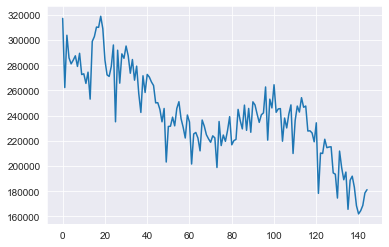

In [9]:
plt.plot(crude['Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)'])

In [10]:
df_crude=crude['Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)']
df_crude.shape

(145,)

In [11]:
df_crude

0      317275
1      262339
2      303897
3      285934
4      281147
        ...  
140    161926
141    164494
142    168655
143    178597
144    181197
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), Length: 145, dtype: int64

In [12]:
sm.tsa.stattools.adfuller(df_crude)

#IN ADF test, H0: Data is NOT STATIONARY
#             H1: Data is STATIONARY

#In result, 2nd value is p-value which is >0.05 hence, Null hypothesis can not be rejected(H0: Data is NOT STATIONARY).

(0.043263406910986665,
 0.9619670163525729,
 13,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 2836.2106782366645)

In [13]:
# De-trend once
df_crude_diff1 = difference(df_crude,1)

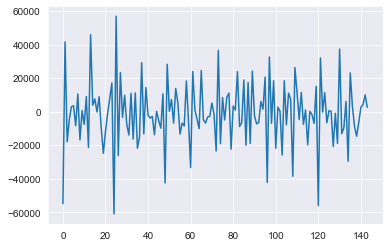

In [14]:
plt.plot(df_crude_diff1)

In [15]:
# De-seasonalize once
df_crude_diff1_diff12 = difference(df_crude_diff1, 12)

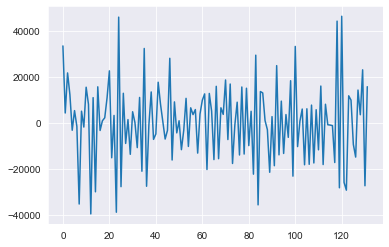

In [16]:
plt.plot(df_crude_diff1_diff12)

In [17]:
# Running thorugh ADF again to check if data is stationary, because now visually the mean betweeen 2 time windows seems to be stationary
# there is no seen seasonality in the data
# Run ADF tests on the de-trended data

sm.tsa.stattools.adfuller(df_crude_diff1_diff12)

# We observe that the p-value is < 0.05, thereby rejecting the NULL hypothesis of NON STATIONARITY
# Therefore the series is now STATIONARY

(-5.239940252537395,
 7.283006359234649e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 2555.7872178724215)

In [18]:
# Creating STL decomposition
from statsmodels.tsa.seasonal import STL

In [19]:
stl = STL(df_crude, period=12) # period 12 since its monthly data


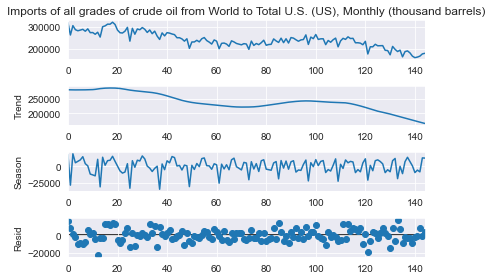

In [20]:
res = stl.fit()
fig = res.plot()

Split data into train and test (70-30)

In [21]:
#from sklearn.model_selection import train_test_split
# this will not work, because, it will take the data randomly and break the sequence

ratio = len(df_crude)*7//10 # taking 70-30 split for train and test
train_crude = df_crude.iloc[:ratio,]
test_crude=df_crude.iloc[ratio:,]



In [22]:
train_crude.shape

(101,)

In [23]:
train_crude

0      317275
1      262339
2      303897
3      285934
4      281147
        ...  
96     262811
97     220558
98     253114
99     246132
100    264554
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), Length: 101, dtype: int64

In [24]:
test_crude

101    242677
102    245369
103    245611
104    219708
105    238109
106    230230
107    241245
108    248552
109    209942
110    236216
111    247608
112    242857
113    254283
114    246671
115    247656
116    227795
117    227975
118    226251
119    219240
120    234307
121    178257
122    210276
123    209958
124    221259
125    214563
126    215083
127    215273
128    194485
129    193493
130    174531
131    211837
132    198663
133    189060
134    195181
135    165586
136    188693
137    191919
138    183087
139    168406
140    161926
141    164494
142    168655
143    178597
144    181197
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), dtype: int64

In [25]:
test_crude.shape

(44,)

# M1- ARIMA

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


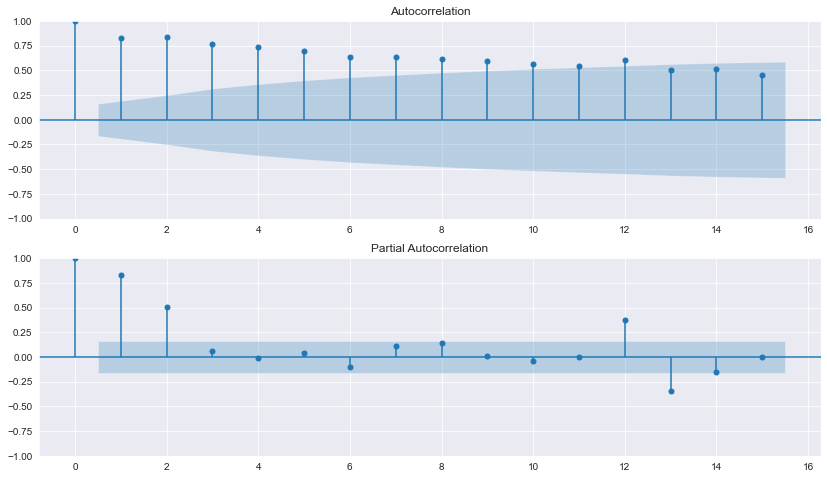

In [27]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_crude, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_crude, lags=15, ax=ax2)

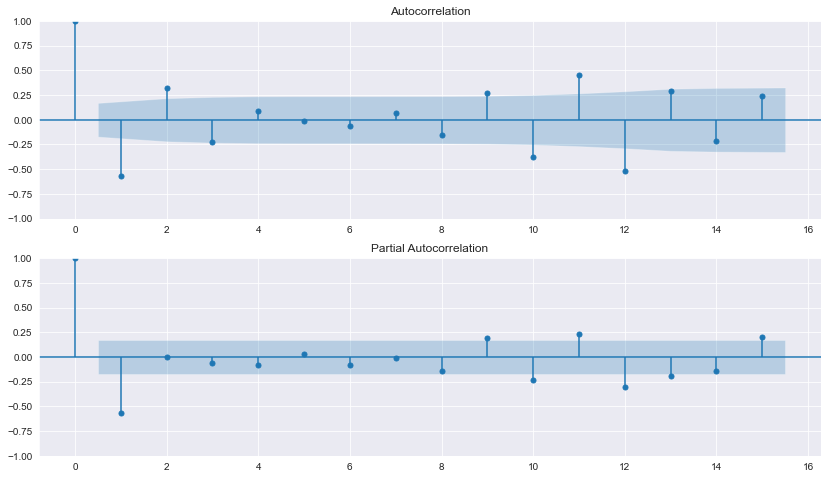

In [28]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_crude_diff1_diff12, lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_crude_diff1_diff12, lags=15, ax=ax2)

In [29]:
#Compute information criteria for many ARMA models.
#Each ic is an attribute with a DataFrame for the results. The AR order used is the row index. 
#The MA order used is the column index. The minimum orders are available as ic_min_order
sm.tsa.stattools.arma_order_select_ic(df_crude_diff1_diff12)

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'bic':              0            1            2
 0  3471.434078  2918.226551  2920.387990
 1  2910.395894  2915.599996  2920.398853
 2  2915.321337  2914.303917  2921.210714
 3  2919.397530  2920.635856  2925.944681
 4  2922.543844  2925.625726  2920.407288,
 'bic_min_order': (1, 0)}

In [30]:
# As per the ACF, PACF plot, p=1,q=0
# Also, as per above function, bic_min_order': (1, 0) which ,says p=1, q=0
# The AIC and BIC for p=1,q=0 is minimum as compared to other values and p-value is significant
# Conclusion: It is a model explained by Auto-regression
M1 = sm.tsa.arima.ARIMA(train_crude,order=(1,1,0),seasonal_order=(0,1,0,12))
M1_res = M1.fit()
M1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                    SARIMAX Results                                                                     
========================================================================================================================================================
Dep. Variable:     Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)   No. Observations:                  101
Model:                                                                             ARIMA(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -970.599
Date:                                                                                          Mon, 29 Aug 2022   AIC                           1945.197
Time:                                                                                                  22:24:05   BIC                           1950.152
Sample:                                                                                                       0   HQIC                          1947.193
                                                                                                          - 101                                         
Covariance Type:                                                                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1947      0.022     -8.797      0.000      -0.238      -0.151
sigma2      1.836e+08   3.57e-13   5.14e+20      0.000    1.84e+08    1.84e+08
===================================================================================
Ljung-Box (L1) (Q):                  14.15   Jarque-Bera (JB):                 2.04
Prob(Q):                              0.00   Prob(JB):                         0.36
Heteroskedasticity (H):               0.53   Skew:                            -0.34
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

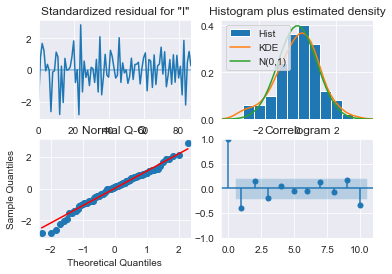

In [31]:
pred = M1_res.plot_diagnostics()

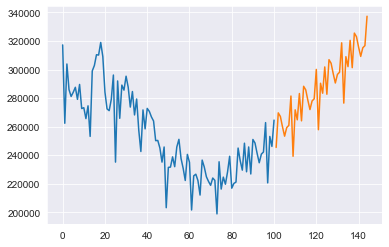

In [32]:
tforecast =  M1_res.forecast(44)# 44 is the test size, so forecasting for the same 
plt.plot(train_crude)
plt.plot(tforecast)

In [33]:
tforecast

101    245408.950502
102    269631.518451
103    267120.007769
104    259852.470391
105    253305.185562
106    259330.241029
107    260852.230228
108    281450.232331
109    239197.231922
110    271753.232001
111    264771.231986
112    283193.231989
113    264048.182491
114    288270.750439
115    285759.239758
116    278491.702380
117    271944.417550
118    277969.473018
119    279491.462216
120    300089.464320
121    257836.463910
122    290392.463990
123    283410.463974
124    301832.463977
125    282687.414479
126    306909.982427
127    304398.471746
128    297130.934368
129    290583.649539
130    296608.705006
131    298130.694205
132    318728.696308
133    276475.695898
134    309031.695978
135    302049.695963
136    320471.695966
137    301326.646467
138    325549.214416
139    323037.703735
140    315770.166357
141    309222.881527
142    315247.936995
143    316769.926193
144    337367.928296
Name: predicted_mean, dtype: float64

In [34]:
tpredict =  M1_res.predict(1)
tpredict

1      256129.917422
2      273043.724657
3      295836.575679
4      289421.652727
5      282070.489236
           ...      
96     237658.209876
97     250493.590869
98     246397.285232
99     230413.892441
100    260994.293714
Name: predicted_mean, Length: 100, dtype: float64

In [35]:
train_crude

0      317275
1      262339
2      303897
3      285934
4      281147
        ...  
96     262811
97     220558
98     253114
99     246132
100    264554
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), Length: 101, dtype: int64

In [36]:
#manually calculating the RMSE for train dataset
((train_crude[1:]-tpredict)**2).mean()

1158302988.105071

In [37]:
import math
math.sqrt(1168269973.8221085)

34179.96450878948

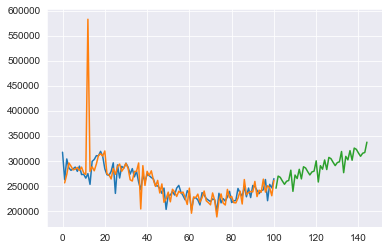

In [38]:
plt.plot(train_crude) # blue
plt.plot(tpredict)#orange
plt.plot(tforecast) #green

In [39]:
tforecast2 = M1_res.get_forecast(44)
confint = np.array(tforecast2.conf_int())

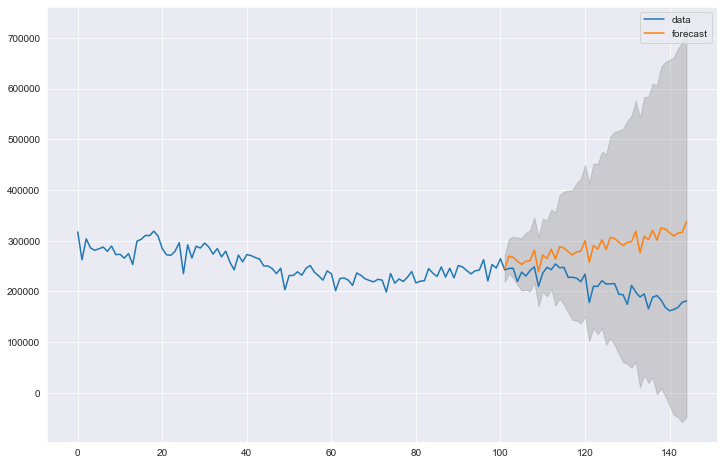

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_crude.index, df_crude, label='data')
ax.plot(tforecast2.predicted_mean.index, tforecast2.predicted_mean, label='forecast')
ax.fill_between(tforecast2.predicted_mean.index, confint[:,0], confint[:,1],color='gray',alpha=0.3)
ax.legend()

In [41]:
test_crude

101    242677
102    245369
103    245611
104    219708
105    238109
106    230230
107    241245
108    248552
109    209942
110    236216
111    247608
112    242857
113    254283
114    246671
115    247656
116    227795
117    227975
118    226251
119    219240
120    234307
121    178257
122    210276
123    209958
124    221259
125    214563
126    215083
127    215273
128    194485
129    193493
130    174531
131    211837
132    198663
133    189060
134    195181
135    165586
136    188693
137    191919
138    183087
139    168406
140    161926
141    164494
142    168655
143    178597
144    181197
Name: Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels), dtype: int64

In [42]:
#RMSE for test data for M1(ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_crude,tforecast,squared=False)
RMSE

89494.19452733423

In [43]:
# Calculating R-Squared to evaluate the model
#The ideal value for R-squared is 1 for best fit model
#Value of R-square can also be negative when the model fitted is worse than the average fitted model. 

from sklearn.metrics import r2_score

r2 = r2_score(test_crude, tforecast)
r2

-9.484573166663678

# M2- AutoARIMA

In [44]:
 #!pip install pmdarima

In [45]:
import pmdarima as pm

In [46]:
M2 = pm.auto_arima(train_crude,start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1952.248, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1960.815, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.608, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1940.787, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1945.197, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1941.933, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1933.937, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1940.916, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1935.907, Time=0.56 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1935.899, Time=0.56 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1942.800, Time=0.26 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1954.344, Time=0.16 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1935.978, Time=0.40 sec
 ARIMA(1,1,1)(1,1,1)[12]

In [47]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -962.909
Date:                            Mon, 29 Aug 2022   AIC                           1933.819
Time:                                    22:24:15   BIC                           1943.728
Sample:                                         0   HQIC                          1937.811
                                            - 101                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1576      0.041     -3.864      0.000      -0.238      -0.078
ar.S.L12      -0.8711      0.120     -7.283      0.000      -1.106      -0.637
ma.S.L12       0.8251      0.135      6.103      0.000       0.560       1.090
sigma2      1.913e+08   5.49e-11   3.48e+18      0.000    1.91e+08    1.91e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.92   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.03   Prob(JB):                         0.51
Heteroskedasticity (H):               0.59   Skew:                            -0.27
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.91e+35. Standard errors may be unstable.
"""

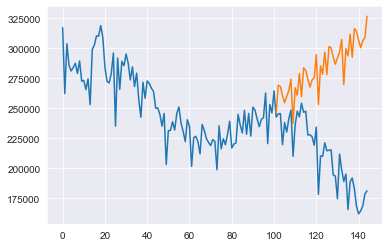

In [48]:
M2.fit(train_crude) #blue
fc = M2.predict(44) #orange
plt.plot(df_crude)
plt.plot(np.arange(101,101+44,1),fc)

In [49]:
fc

101    245950.348581
102    269204.176948
103    268334.165567
104    260465.892819
105    254684.034719
106    259848.953950
107    264995.046809
108    274329.923088
109    237431.082696
110    267089.920457
111    261028.036928
112    278998.997248
113    259701.866277
114    283765.990226
115    281472.570828
116    274126.339436
117    267677.947247
118    273592.104170
119    275581.159845
120    294727.622577
121    253164.640942
122    285347.268592
123    278483.848782
124    296847.720955
125    278154.697224
126    301512.952592
127    300459.499225
128    292658.504659
129    286790.746848
130    292052.224232
131    296791.453308
132    307390.799707
133    269890.867202
134    299874.958877
135    293709.777203
136    311731.374115
137    292512.097582
138    316485.252581
139    314351.634047
140    306946.794962
141    300573.232142
142    306403.274862
143    308746.759671
144    326791.711117
dtype: float64

In [50]:
#RMSE for test data for M2 (Auto-ARIMA)
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_crude,fc,squared=False)
RMSE

83966.003489222

In [51]:
from sklearn.metrics import r2_score

r2 = r2_score(test_crude, fc)
r2

-8.229283632590127

# M3- Holts Winter's Model

# Simple Exponential Smoothing: Level 

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [53]:
ses = SimpleExpSmoothing(train_crude)

In [54]:
type(ses)

statsmodels.tsa.holtwinters.model.SimpleExpSmoothing

In [55]:
result1 = ses.fit(smoothing_level=0.5, optimized=False)

In [56]:
result1.summary()

Dep. Variable:,"Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)",No. Observations:,101
Model:,SimpleExpSmoothing,SSE,25381535471.943
Optimized:,False,AIC,1957.559
Trend:,None,BIC,1962.789
Seasonal:,None,AICC,1957.976
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:24:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,3.1728e+05,l.0,False


In [57]:
pred1 = result1.predict(start=1, end=145)

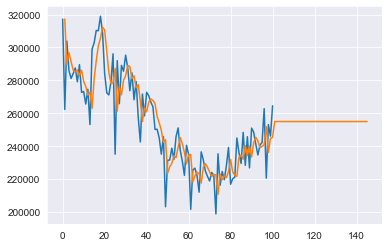

In [58]:
plt.plot(train_crude)
plt.plot(pred1)

In [59]:
result1.params

{'smoothing_level': 0.5,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 317275.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

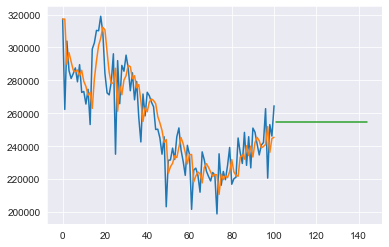

In [60]:
plt.plot(train_crude)
plt.plot(result1.fittedvalues)
plt.plot(result1.forecast(44))

In [61]:
result2 = ses.fit(smoothing_level=0.8, optimized=False) # optimize the values of alpha from 0.5 to 0.8

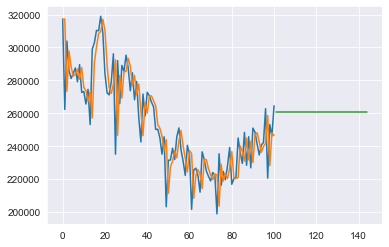

In [62]:
plt.plot(train_crude)
plt.plot(result2.fittedvalues)
plt.plot(result2.forecast(44))
# the model is better fitted when we increase the alpha from 0.5 to 0.8 i.e. the model is better explained by the recent observed value of alpha as compared to previous values

In [63]:
result2.params

{'smoothing_level': 0.8,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 317275.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Holt's linear trend values: Level+Trend

In [64]:
from statsmodels.tsa.holtwinters import Holt

In [65]:
model = Holt(train_crude)
result3 = model.fit()
result3.params

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.5707142857142856,
 'smoothing_trend': 0.5707142857142856,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 317275.0,
 'initial_trend': -54936.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
result3.summary()

Dep. Variable:,"Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)",No. Observations:,101
Model:,Holt,SSE,39849558699.461
Optimized:,True,AIC,2007.119
Trend:,Additive,BIC,2017.579
Seasonal:,None,AICC,2008.013
Seasonal Periods:,None,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:24:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5707143,alpha,True
smoothing_trend,0.5707143,beta,True


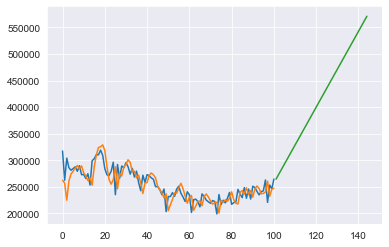

In [67]:
plt.plot(train_crude)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(44))

# Final Holtz Winter Model: Level+Trend+Seasonality

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [69]:
model = ExponentialSmoothing(train_crude, trend='add', seasonal='add', seasonal_periods=12)
# seasonal = add as this is a additive model and not multiplicative as the amplitude is not changing

In [70]:
result4 = model.fit()
result4.params

C:\Users\Ishangi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6060714285714286,
 'smoothing_trend': 0.027548701298701295,
 'smoothing_seasonal': 0.021884920634920632,
 'damping_trend': nan,
 'initial_level': 276878.0166666666,
 'initial_trend': 1278.2643939394038,
 'initial_seasons': array([  -921.64149306, -35189.50607639,   5682.72309028,  -2205.54774306,
         11856.95225694,   9460.61892361,  15729.22309028,   9856.56684028,
           695.27517361,  -2389.18315972,  -6977.65190972,  -5597.82899306]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
result4.summary()

Dep. Variable:,"Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)",No. Observations:,101
Model:,ExponentialSmoothing,SSE,12194663759.003
Optimized:,True,AIC,1911.524
Trend:,Additive,BIC,1953.365
Seasonal:,Additive,AICC,1919.865
Seasonal Periods:,12,Date:,"Mon, 29 Aug 2022"
Box-Cox:,False,Time:,22:24:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6060714,alpha,True
smoothing_trend,0.0275487,beta,True


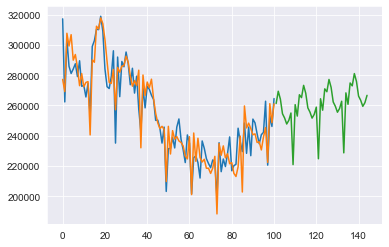

In [72]:
plt.plot(train_crude)
plt.plot(result4.fittedvalues)
plt.plot(result4.forecast(44))

In [73]:
result4.forecast(44)

101    261294.286982
102    269397.544795
103    264207.963775
104    254521.553284
105    251709.707724
106    247742.361660
107    250177.590696
108    255012.110377
109    220879.006497
110    260541.781564
111    252979.532660
112    267084.677590
113    265187.324149
114    273290.581962
115    268101.000943
116    258414.590451
117    255602.744891
118    251635.398827
119    254070.627863
120    258905.147544
121    224772.043664
122    264434.818731
123    256872.569827
124    270977.714757
125    269080.361316
126    277183.619130
127    271994.038110
128    262307.627618
129    259495.782058
130    255528.435994
131    257963.665030
132    262798.184711
133    228665.080832
134    268327.855898
135    260765.606994
136    274870.751924
137    272973.398483
138    281076.656297
139    275887.075277
140    266200.664785
141    263388.819225
142    259421.473161
143    261856.702198
144    266691.221878
dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(test_crude,result4.forecast(44),squared=False)
RMSE

57537.89360256824

In [75]:
from sklearn.metrics import r2_score

r2 = r2_score(test_crude, result4.forecast(44))
r2

-3.3338007973892525

# Conclusion: Holt Winter's model is the preferred model for this data as it is showing better R-squared value and better accuracy